### Step 1: Import Libraries and Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import gradio as gr

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


### Step 2: Data Preparation

In [2]:
import zipfile
import os

# Define the paths to the .zip files and the target extraction folders
train_zip_path = r"C:\Users\komal\Downloads\train_dir.zip"
test_zip_path = r"C:\Users\komal\Downloads\test_dir.zip"
extract_train_dir = r"C:\Users\komal\Downloads\dataset\train"
extract_test_dir = r"C:\Users\komal\Downloads\dataset\test"

# Extract the training dataset
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_train_dir)

# Extract the testing dataset
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_test_dir)

print("Datasets unzipped successfully!")


Datasets unzipped successfully!


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to extracted folders
train_dir = r"C:\Users\komal\Downloads\dataset\train"
test_dir = r"C:\Users\komal\Downloads\dataset\test"

# Image Data Generator for Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data generator
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4210 images belonging to 1 classes.
Found 1052 images belonging to 1 classes.
Found 1159 images belonging to 1 classes.


### Step 3: Set Up and Train the Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define a CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("CustomPalmDiseaseModel.keras", monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the Model
history = model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[checkpoint, early_stopping])
print("Model training complete and saved as 'CustomPalmDiseaseModel.keras'")


C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 201ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━

### Step 4: Model Evaluation and Metrics Calculation

Model loaded successfully.
 3/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step 

C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Classification Report:
              precision    recall  f1-score   support

    test_dir       1.00      1.00      1.00      1159

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



C:\Users\komal\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


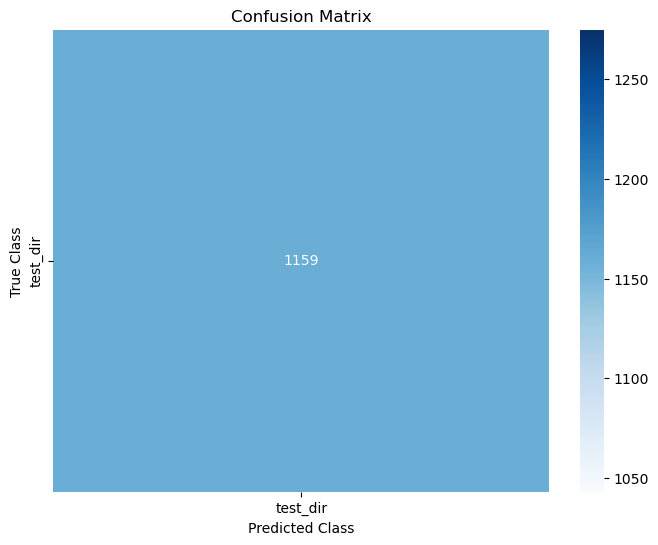

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model("CustomPalmDiseaseModel.keras")
print("Model loaded successfully.")

# Reset the test generator
test_gen.reset()

# Generate predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


### Step 5: Visualize Training and Validation Accuracy and Loss

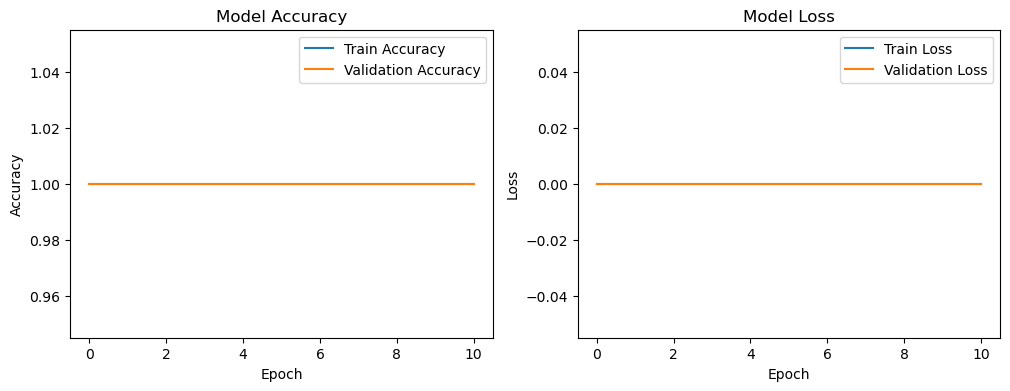

In [7]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


### Step 6: Grad-CAM for Model Interpretation

In [9]:
from tensorflow.keras import backend as K
import cv2

def get_gradcam_heatmap(img_array, model, layer_name, class_idx):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

def overlay_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    return superimposed_img

# Use Grad-CAM to explain a sample prediction
def explain_prediction(img_path, model, layer_name="conv2d_2"):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    heatmap = get_gradcam_heatmap(img_array, model, layer_name, class_idx)

    overlay_img = overlay_gradcam(img_path, heatmap)
    plt.imshow(overlay_img)
    plt.axis('off')
    plt.title(f"Grad-CAM: Predicted - {class_labels[class_idx]}")
    plt.show()


### Step 7: Streamlit Interface for Real-Time Prediction

In [12]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install jupyter-server-proxy

Note: you may need to restart the kernel to use updated packages.
